In [1]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import keras
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
file_train="zzww_pfo_train400000.csv"
data_train=np.loadtxt(file_train,delimiter=',')
data_train_example=data_train[:400000,1:]
data_train_label=data_train[:400000,0]

file_val="zzww_pfo_val80000.csv"
data_val=np.loadtxt(file_val,delimiter=',')
data_val_example=data_val[:80000,1:]
data_val_label=data_val[:80000,0]

file_test="zzww_pfo_test80000.csv"
data_test=np.loadtxt(file_test,delimiter=',')
data_test_example=data_test[:80000,1:]
data_test_label=data_test[:80000,0]



In [3]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

print(data_train_label[:100])

In [4]:
model.add(Dense(units=200, input_dim=400))
model.add(Activation("relu"))
model.add(Dense(units=200))
model.add(Activation("relu"))
model.add(Dense(units=200))
model.add(Activation("relu"))
model.add(Dense(units=200))
model.add(Activation("relu"))
model.add(Dense(units=200))
model.add(Activation("relu"))
model.add(Dense(units=1))
model.add(Activation("sigmoid"))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics=['accuracy'])
history=LossHistory()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
__________

In [5]:
model.fit(data_train_example,data_train_label,epochs=500,batch_size=100,validation_data=(data_val_example,data_val_label),callbacks=[history,early_stopping])

Train on 400000 samples, validate on 80000 samples
Epoch 1/500
400000/400000 [==============================] - 47s - loss: 0.6594 - acc: 0.5999 - val_loss: 0.6466 - val_acc: 0.6157
Epoch 2/500
400000/400000 [==============================] - 36s - loss: 0.6354 - acc: 0.6306 - val_loss: 0.6414 - val_acc: 0.6239
Epoch 3/500
400000/400000 [==============================] - 37s - loss: 0.6177 - acc: 0.6490 - val_loss: 0.6381 - val_acc: 0.6264
Epoch 4/500
400000/400000 [==============================] - 37s - loss: 0.6008 - acc: 0.6660 - val_loss: 0.6387 - val_acc: 0.6271
Epoch 5/500
400000/400000 [==============================] - 39s - loss: 0.5831 - acc: 0.6806 - val_loss: 0.6558 - val_acc: 0.6240
Epoch 6/500
400000/400000 [==============================] - 38s - loss: 0.5664 - acc: 0.6951 - val_loss: 0.6620 - val_acc: 0.6237
Epoch 7/500
400000/400000 [==============================] - 37s - loss: 0.5494 - acc: 0.7083 - val_loss: 0.6672 - val_acc: 0.6205
Epoch 8/500
400000/400000 [=====

In [6]:
score=model.evaluate(data_test_example,data_test_label,batch_size=100)

79500/80000 [============================>.] - ETA: 0s

In [7]:
print ('test accuracy is:',score[1])

('test accuracy is:', 0.61372499875724318)


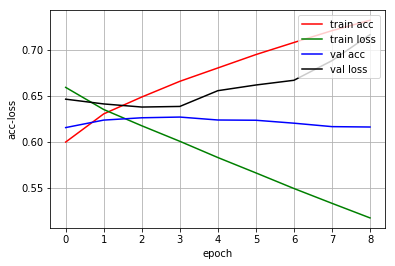

In [8]:
history.loss_plot('epoch')